# Overview

This is the exploratory data analysis of the [German Credit Database](https://www.kaggle.com/uciml/german-credit).

In this dataset, each entry represents a person who takes a credit by a bank. 

This dataset is a subset of the full dataset by Prof. Hofmann. Original dataset: [UCI](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29)

# Data Collection

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/german-credit/german_credit_data.csv


In [2]:
data = pd.read_csv("../input/german-credit/german_credit_data.csv")
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


# Data cleaning

In [3]:
data.drop("Unnamed: 0", inplace=True, axis=1)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [4]:
job_dictionary = {0:"unskilled and non-resident", 1:"unskilled and resident", 2:"skilled", 3:"higly skilled"}
data = data.replace({"Job":job_dictionary})
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,skilled,own,NaN,little,1169,6,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,radio/TV
2,49,male,unskilled and resident,own,little,NaN,2096,12,education
3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,car


# Data Information

In [5]:
data.shape

(1000, 9)

In [6]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [8]:
data.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [9]:
data.isnull().sum() / data.shape[0]

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
dtype: float64

Checking and Saving accounts has significant amount of missing data. This may be due to the fact that many people didn't have an account when applying to take credit.

# Data Exploration

## Numeric Data

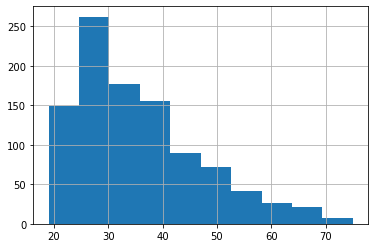

In [10]:
data.Age.hist()

Maximum number of applicants were between the ages of 25-30

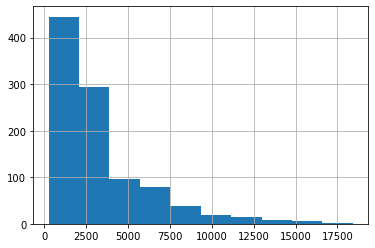

In [11]:
data["Credit amount"].hist()

The credit amount is exponentially decreasing

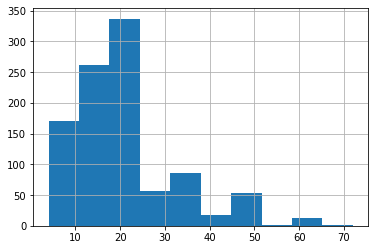

In [12]:
data.Duration.hist()

Maximum number of credits were for a duration of 1-2 years

In [13]:
corr = data[["Age","Credit amount", "Duration"]].corr()
corr

,Age,Credit amount,Duration
Age,1.000000,0.032716,-0.036136
Credit amount,0.032716,1.000000,0.624984
Duration,-0.036136,0.624984,1.000000


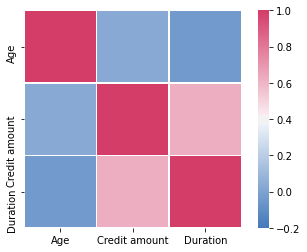

In [14]:
cmap = sns.diverging_palette(250, 0, as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True, linewidths=.5, vmax=1, vmin=-.2)

It can be observed that duration and Credit amount are moderately correlated and age has a small very little correaltion to both.

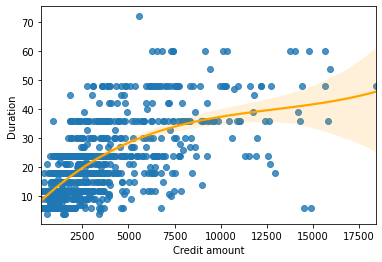

In [15]:
sns.regplot(x=data["Credit amount"], y=data["Duration"],order=3, line_kws={"color":"orange"})

We can see that it is an upward trend between Credit amount and Duration and then slows down as it reaches the 40 month mark. Thus we can say that people didn't prefer to take big credits for large amount of time.

## Categorical

In [16]:
df_cat = data[['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Purpose']]

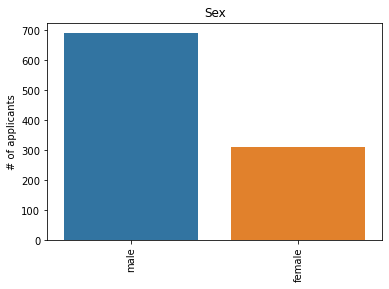

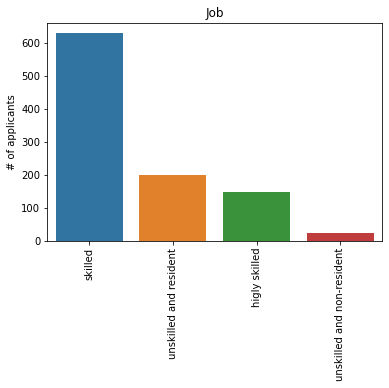

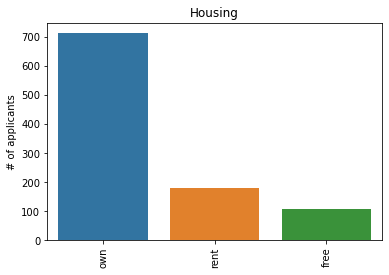

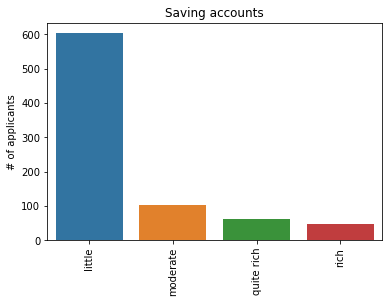

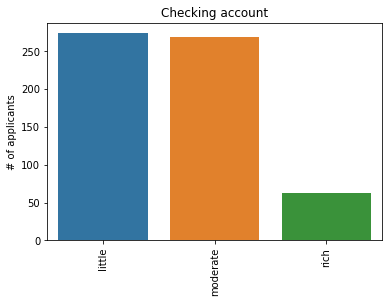

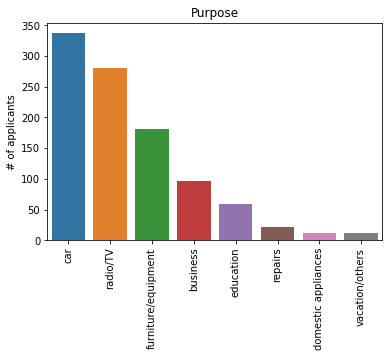

In [17]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    title = cat_num.name
    cat_num.name = "# of applicants"
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    
    chart.y ="# of applicants"
    plt.title(title)
    plt.show()

* Males had more applications for credit
* Skilled Workers had most amount of applications for credit
* People who owned houses applied more for credit
* Poor people applied for more credit
* Maximum applications were for cars, TV and furniture

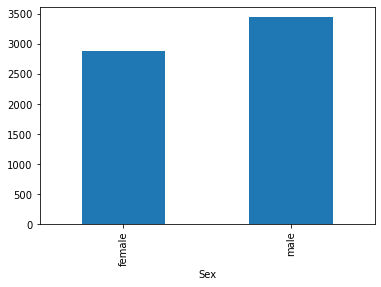

In [29]:
data.groupby("Sex").mean()["Credit amount"].T.plot(kind="bar")

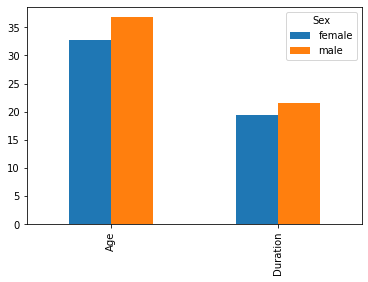

In [30]:
data.groupby("Sex").mean()[["Age", "Duration"]].T.plot(kind="bar")

We can see that Males took more credit, for more duration and at a greater age.

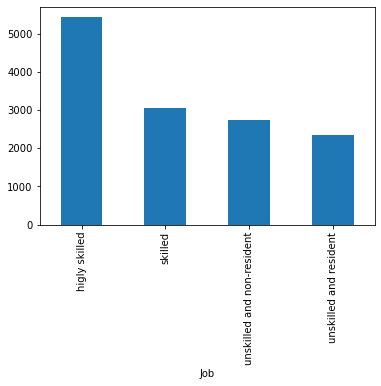

In [20]:
data.groupby("Job").mean()["Credit amount"].T.plot(kind="bar")

We can see that highly skilled workers took greater credit amount than others even though they applied for less no. of applications.

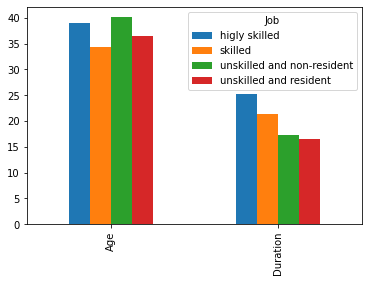

In [31]:
data.groupby("Job").mean()[["Age", "Duration"]].T.plot(kind="bar")

We see that highly skilled and skilled workers took longer duration credit from banks. In age we don't see much of a difference as all job classes were between 30-40.

From the previous plot and this plot we understand that the banks gave higher credit amount for more duration to highly skilled workers.
But skilled workers who applied for more no. of applications got lower credit amount.

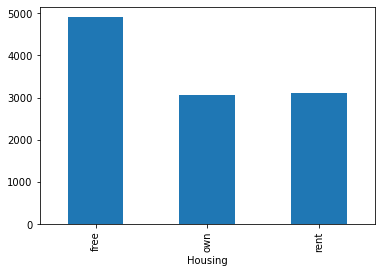

In [32]:
data.groupby("Housing").mean()["Credit amount"].T.plot(kind="bar")

People with free housing applied for larger amount of credit. This is understandable as someone who can't afford his own house must take credit from the bank to survive.

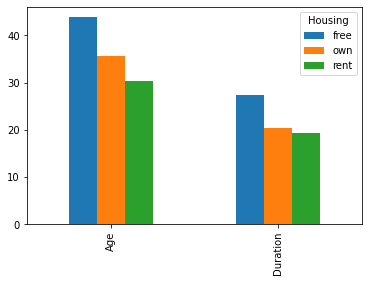

In [33]:
data.groupby("Housing").mean()[["Age", "Duration"]].T.plot(kind="bar")

People who live in free housing were of higher age.

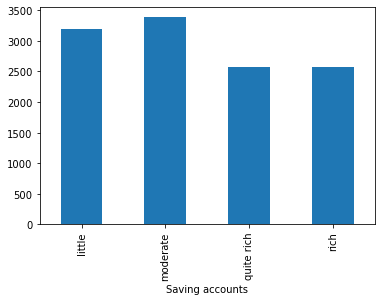

In [35]:
data.groupby("Saving accounts").mean()["Credit amount"].T.plot(kind="bar")

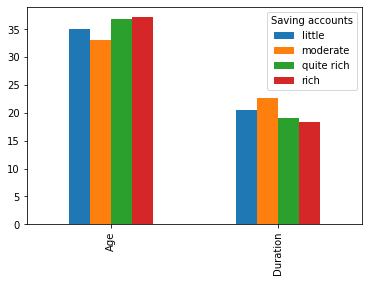

In [36]:
data.groupby("Saving accounts").mean()[["Age", "Duration"]].T.plot(kind="bar")

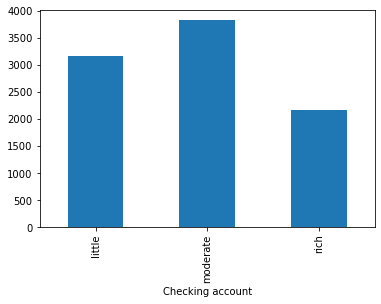

In [37]:
data.groupby("Checking account").mean()["Credit amount"].T.plot(kind="bar")

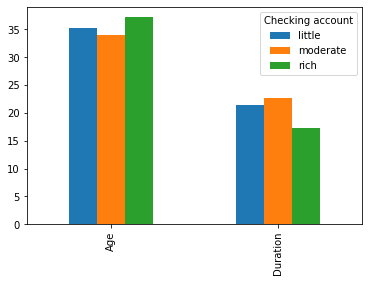

In [38]:
data.groupby("Checking account").mean()[["Age", "Duration"]].T.plot(kind="bar")

We can see that the middle class took higher amount of credit and at a higher frequency.

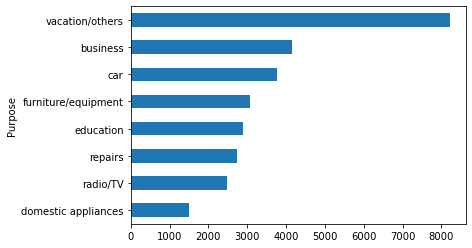

In [40]:
data.groupby("Purpose",sort=True).mean()["Credit amount"].T.sort_values().plot(kind="barh")

Highest amount of credit was taken for business

# Some personal insights

We saw that people having free housing took the highest amount of loans. Let's see what did they were applying for.

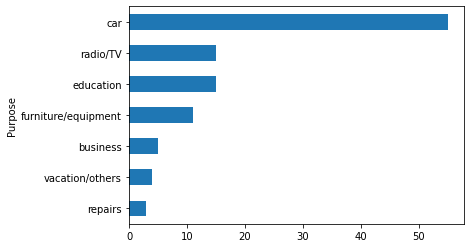

In [43]:
data.groupby(["Housing","Purpose"], sort=True).count().loc["free"]["Credit amount"].T.sort_values().plot(kind="barh")

The biggest applications for credit were for car. People who didn't have house where applying to get cars.

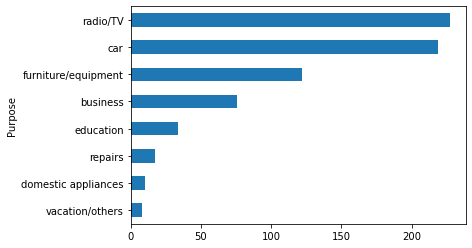

In [44]:
data.groupby(["Housing","Purpose"], sort=True).count().loc["own"]["Credit amount"].T.sort_values().plot(kind="barh")

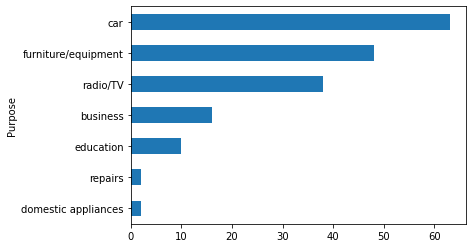

In [45]:
data.groupby(["Housing","Purpose"], sort=True).count().loc["rent"]["Credit amount"].T.sort_values().plot(kind="barh")

Car, radio/TV and furniture were the categories for which highest applications were submitted.

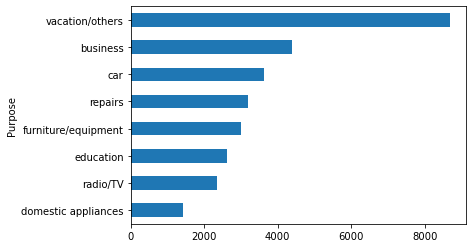

In [49]:
data.groupby(["Saving accounts","Purpose"], sort=True).mean().loc["little"]["Credit amount"].T.sort_values().plot(kind="barh")

The poor spent more on business, car and repairs, which are necessities

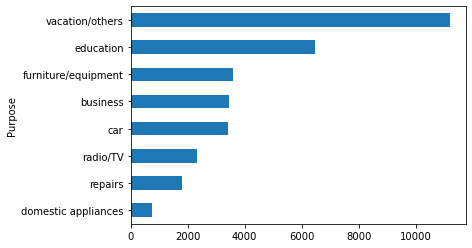

In [50]:
data.groupby(["Saving accounts","Purpose"], sort=True).mean().loc["moderate"]["Credit amount"].T.sort_values().plot(kind="barh")

The middle class spent the most on education.

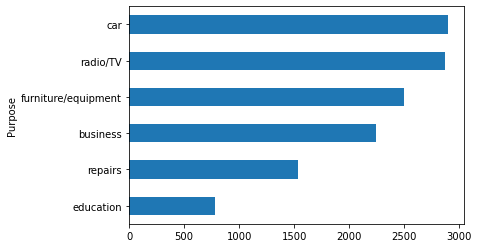

In [51]:
data.groupby(["Saving accounts","Purpose"], sort=True).mean().loc["rich"]["Credit amount"].T.sort_values().plot(kind="barh")

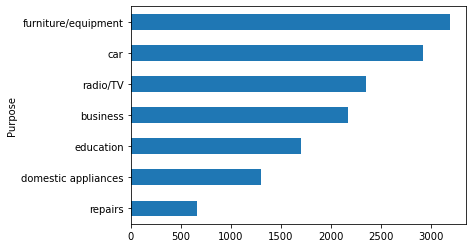

In [52]:
data.groupby(["Saving accounts","Purpose"], sort=True).mean().loc["quite rich"]["Credit amount"].T.sort_values().plot(kind="barh")

The rich and the quite rich took credit for luxury items like car, furniture and TV

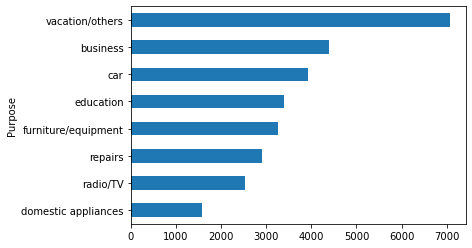

In [53]:
data.groupby(["Sex","Purpose"], sort=True).mean().loc["male"]["Credit amount"].T.sort_values().plot(kind="barh")

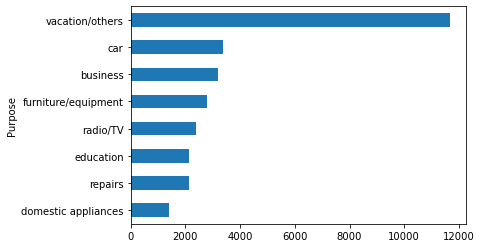

In [55]:
data.groupby(["Sex","Purpose"], sort=True).mean().loc["female"]["Credit amount"].T.sort_values().plot(kind="barh")

Females took credit for non essential items and vacations than males.

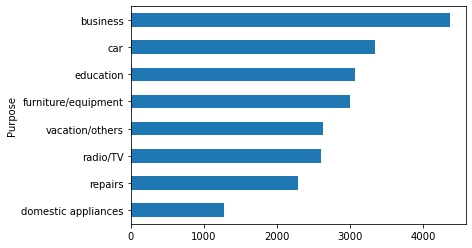

In [56]:
data.groupby(["Job","Purpose"], sort=True).mean().loc["skilled"]["Credit amount"].T.sort_values().plot(kind="barh")

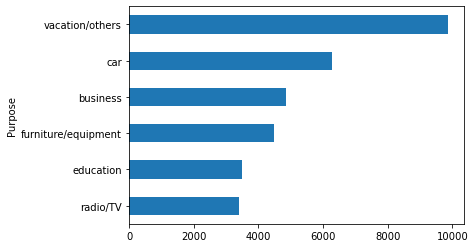

In [57]:
data.groupby(["Job","Purpose"], sort=True).mean().loc["higly skilled"]["Credit amount"].T.sort_values().plot(kind="barh")

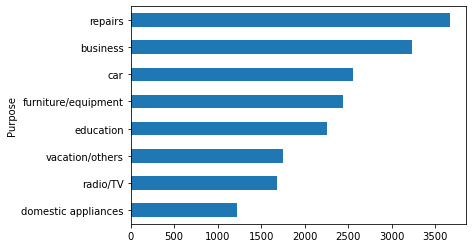

In [58]:
data.groupby(["Job","Purpose"], sort=True).mean().loc["unskilled and resident"]["Credit amount"].T.sort_values().plot(kind="barh")

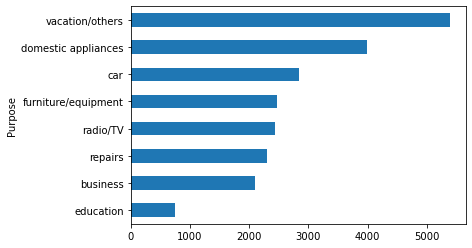

In [59]:
data.groupby(["Job","Purpose"], sort=True).mean().loc["unskilled and non-resident"]["Credit amount"].T.sort_values().plot(kind="barh")

# Conclusion

Some interesting points that were noticed:
* People didn't prefer to take big credits for large amount of time
* We can see that highly skilled workers took greater credit amount than others even though they applied for less no. of applications
* The biggest applications for credit were for car. People who didn't have house where applying to get cars.